# Semana 09

## FSC5705 - Física Computacional
## 04/10/2023

### Atenção
- **Não esqueça de reiniciar o kernel e rodar todas as células para testar o notebook antes de enviar.**

### Universo em expansão

Vamos agora descobrir que o universo está em expansão, de acordo com a lei de Hubble–Lemaître. No começo do século 20, com o desenvolvimento da Relatividade Geral, Alexander Friedmann, e logo depois Georges Lemaître, chegaram de forma independente em soluções nas quais o universo estava em expansão. Edwin Hubble usou estrelas variáveis do tipo cefeidas para calcular as distâncias de algumas galáxias próximas (determinar distâncias astronômicas é um problema gigante, veja a [Escada cósmica de distâncias](https://en.wikipedia.org/wiki/Cosmic_distance_ladder)). Juntando essas distâncias com medidas de velocidade provenientes do [*redshift*](https://en.wikipedia.org/wiki/Redshift#Measurement,_characterization,_and_interpretation) (desvio do espectro para o vermelho), ele obteve uma evidência observacional de que de fato o universo se expandia.

Vamos usar alguns dados mais modernos de distâncias e redshifts de [Freedman et al (2001)](https://ui.adsabs.harvard.edu/abs/2001ApJ...553...47F/abstract) para tentar repetir o feito de Hubble. Queremos determinar a taxa em que o universo se expande.

Considere a tabela abaixo. Temos a velocidade $v$ em que as galáxias se afastam de nós, em $\mathrm{km}\,\mathrm{s}^{-1}$, obtida através do redshift de linhas espectrais. Temos também a distância $d$, em [megaparsecs](https://pt.wikipedia.org/wiki/Parsec) ($\mathrm{Mpc}$), obtidas através de estrelas variáveis do tipo cefeidas.

In [2]:
import numpy as np
galaxias = np.array([('IC 4182',321, 4.53),
                     ('NGC 0300', 144, 2.02),
                     ('NGC 0925', 553, 9.12),
                     ('NGC 1326A', 1836, 16.14),
                     ('NGC 1365', 1636, 17.22),
                     ('NGC 1425', 1512, 20.89),
                     ('NGC 2090', 931, 11.43),
                     ('NGC 2403', 131, 3.13),
                     ('NGC 2541', 559, 11.22),
                     ('NGC 3031', -34, 3.55),
                     ('NGC 3198', 662, 13.68),
                     ('NGC 3351', 778, 13.43),
                     ('NGC 3368', 897, 9.33),
                     ('NGC 3621', 805, 9.86),
                     ('NGC 4321', 1571, 6.55),
                     ('NGC 4414', 716, 16.6),
                     ('NGC 4496A', 1730, 14.52),
                     ('NGC 4535', 1961, 14.79),
                     ('NGC 4536', 1804, 14.45),
                     ('NGC 4548', 486, 15),
                     ('NGC 4639', 1010, 20.99),
                     ('NGC 4725', 1206, 11.91),
                     ('NGC 5253', 404, 3.25),
                     ('NGC 7331', 816, 14.52)],
                    dtype=[('nome', 'U10'),
                           ('v', 'float64'),
                           ('d', 'float64')])
v = galaxias['v']
d = galaxias['d']

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'serif'
plt.rcParams['mathtext.fontset'] = 'stix'

**a.** Faça o gráfico dos pontos observados, usando a distância no eixo $x$ e a velocidade de afastamento no eixo $y$.

Text(0, 0.5, 'velocidade de afastamento')

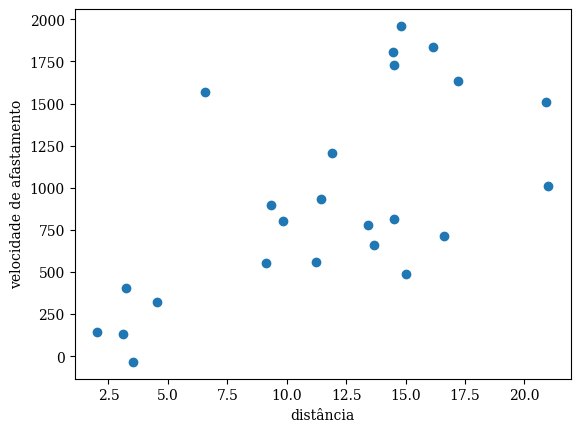

In [3]:
fig, ax = plt.subplots(1,1)

ax.scatter(d,v)
ax.set_xlabel("distância")
ax.set_ylabel("velocidade de afastamento")

**b.** Por incrível que pareça, Hubble tinha dados piores! Se o seu gráfico foi feito corretamente, você verá que existe uma certa tendência do redshift aumentar com a distância, com galáxias mais distantes se afastando com velocidades maiores. Para um astrofísico, uma tendência é mais que suficiente para justificar a busca por uma correlação, para derivar uma lei empírica. Se $v$ e $d$ formam uma relação linear, podemos escrever

$$
v(d) = v_0 + H_0\,d,
$$

onde $v_0$ é a velocidade se $d=0$, e $H_0$ é a constante de proporcionalidade entre $v$ e $d$, em unidades de $[\mathrm{km}\,\mathrm{s}^{-1}\,\mathrm{Mpc}^{-1}]$. Faça um ajuste linear e determine (e imprima) estes coeficientes. Faça também o gráfico mostrando o ajuste, para ter certeza de que o ajuste funcionou. Como não temos as incertezas, admita que os erros são iguais a 1.

In [4]:
# Calculando S
S = 0
S_d = 0
S_v = 0
S_dv = 0
S_dd = 0

N = len(v)

# Laço que vai calcular todos os valores acima
for i in range(N):
    S += (1/1**2)
    S_d += (d[i]/1**2)
    S_v += (v[i]/1**2)
    S_dv += (d[i]*v[i]/1**2)
    S_dd += (d[i]**2/1**2)

Delta = S*S_dd - S_d**2

# calculando v0 e H0
v0 = (S_dd*S_v - S_d*S_dv)/(Delta)
H0 = (S*S_dv - S_d*S_v)/(Delta)

In [5]:
v0,H0

(140.7195943895426, 68.52094248966661)

In [6]:
def eqHUBBLE(d):
    return v0 + d*H0

v_exp = np.zeros(len(v))

for i in range(N):
    v_exp[i] = eqHUBBLE(d[i])

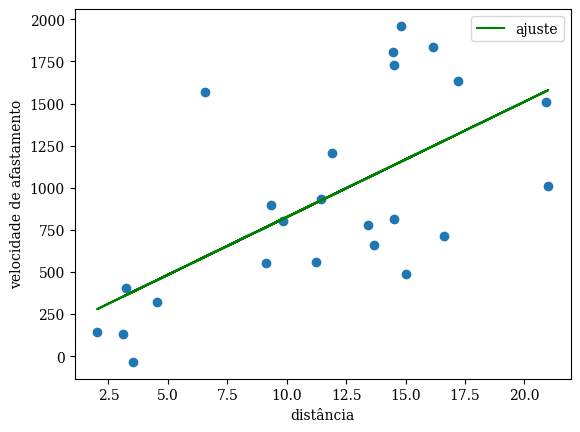

In [7]:
fig, ax = plt.subplots(1,1)

ax.scatter(d,v)
ax.plot(d,v_exp, label = "ajuste", color = "green")
ax.set_xlabel("distância")
ax.set_ylabel("velocidade de afastamento")
ax.legend()

**c.** Calcule o *resíduo* do ajuste, isto é,

\begin{align}
r^2 = \frac{1}{N - M} \sum_{i=0}^{N-1} \left[v_i - v(d_i)\right]^2,
\end{align}

onde $M$ é o número de graus de liberdade do modelo (neste caso, $M = 2$). O resíduo pode ser usado como uma estimativa grosseira do erro associado às medidas de velocidade.

In [23]:
M = 2
soma = 0

for i in range(N):
    soma += (v[i] - eqHUBBLE(d[i]))**2

r = np.sqrt((1/(N-M))*soma)
print(f'O valor de r calculado é {r:.3f}')

O valor de r calculado é 468.940


**d.** Repare que o coeficiente linear $v_0$ do ajuste é muito pequeno em comparação ao resíduo do modelo ajustado aos dados. Vamos considerar então que a nossa lei empírica é simplesmente

$$
v = H_0\,d.
$$

Esta é a lei de Hubble–Lemaître, onde $H_0$ é a chamada *constante de Hubble*. Podemos agora explorar algumas consequências desta lei.

Suponha que a velocidade de cada galáxia, em primeira aproximação, é constante no tempo. Da cinemática, temos

$$
v_i = \frac{d_i}{T_i},
$$

onde $T_i$ é o tempo que a galáxia levou para percorrer a distância $d_i$. Comparando com a lei empírica que determinamos,

\begin{align}
v_i &= \frac{d_i}{T_i} = H_0 d_i \\
\implies T_i &= \frac{1}{H_0} \equiv T.
\end{align}

Isto é, o tempo que todas as galáxias viajaram é igual! Se voltarmos no tempo, estas galáxias se aproximam de nós até que, há um tempo $T$ atrás, $d_i=0$, para todas as galáxias. Em outras palavras, estas galáxias estavam exatamente sobre a nossa.

Você acabou de encontrar uma evidência de que, aparentemente, todas as galáxias do Universo estavam muito próximas, há um tempo $T = H_0^{-1}$ atrás, chamado *tempo de Hubble*. Esta evidência evoluiu para se tornar o modelo cosmológico do Big Bang.

Numa primeira aproximação, este tempo $T$ dá a idade do universo no modelo do Big Bang. Sabendo que $1\,\mathrm{Mpc} = 30.857 \times 10^{18}\,\mathrm{km}$, calcule a idade do universo, segundo os nossos dados. Imprima o resultado em bilhões de anos (1 bilhão $=10^9$).

*Nota*: Segundo a [colaboração Planck](https://www.aanda.org/articles/aa/full_html/2020/09/aa33910-18/T2.html), usando o modelo $\Lambda\mathrm{CDM}$ (que envolve a energia e matéria escura, expansão acelerada, etc.) em vez da nossa aproximação grosseira, a constante de Hubble é $H_0 = 67.66 \pm 0.42\,\mathrm{km}\,\mathrm{s}^{-1}\,\mathrm{Mpc}^{-1}$, e a idade do universo é de $(13.787 \pm 0.020) \times 10^9$ anos.

In [31]:
MPC = 30.857e18
# dt = dx/dv
T = (MPC)/(H0)
ano = 365.25*24*3600

T_universo = (T/ano)/1e9
print(f"O período do universo calculado utilizando H0 = {H0:.2f} é T = {T_universo:.2f} bilhões de anos")

O período do universo calculado utilizando H0 = 68.52 é T = 14.27 bilhões de anos
